In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
Y = np.array([1, -1, -1, 1])



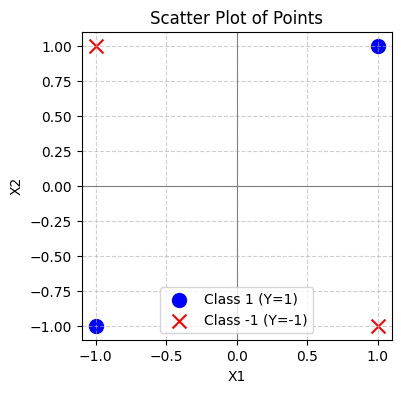

In [4]:
# Separate by class
pos_points = X[Y == 1]
neg_points = X[Y == -1]

# Plot
plt.figure(figsize=(4, 4))
plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', label='Class 1 (Y=1)', s=100, marker='o')
plt.scatter(neg_points[:, 0], neg_points[:, 1], color='red', label='Class -1 (Y=-1)', s=100, marker='x')

# Axes and labels
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter Plot of Points")
plt.show()

## Linear Separability After First Layer

In [35]:
def linear_act_func(z):
    return 2*z - 3

def layer(X, W, w0, act_func):
    inner_f = W @ X.T
    inner_f += w0
    f = act_func(inner_f)
    return f


In [36]:
W = np.array([[0, 0], [0, 0]])
w0 = np.array([0, 0])

f = []  

for i in range(len(X)):
    result = layer(X[i], W, w0, linear_act_func)
    f.append(result)
f = np.array(f)
f

array([[-3, -3],
       [-3, -3],
       [-3, -3],
       [-3, -3]])

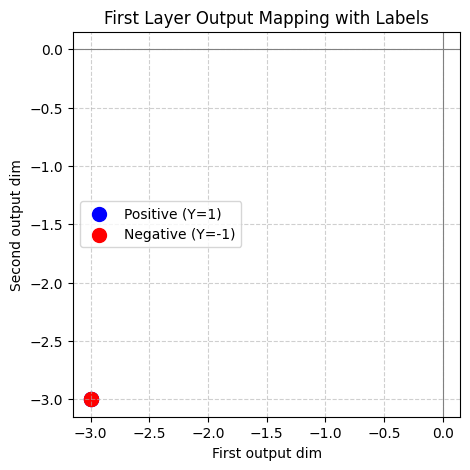

In [37]:
# Separate by label
pos_points = f[Y == 1]
neg_points = f[Y == -1]

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', label='Positive (Y=1)', s=100, marker='o')
plt.scatter(neg_points[:, 0], neg_points[:, 1], color='red', label='Negative (Y=-1)', s=100, marker='o')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlabel("First output dim")
plt.ylabel("Second output dim")
plt.title("First Layer Output Mapping with Labels")
plt.show()

In [38]:
W = np.array([[2, -2], [2, -2]])
w0 = np.array([1, 1])

f = []  

for i in range(len(X)):
    result = layer(X[i], W, w0, linear_act_func)
    f.append(result)
f = np.array(f)
f

array([[-1, -1],
       [ 7,  7],
       [-9, -9],
       [-1, -1]])

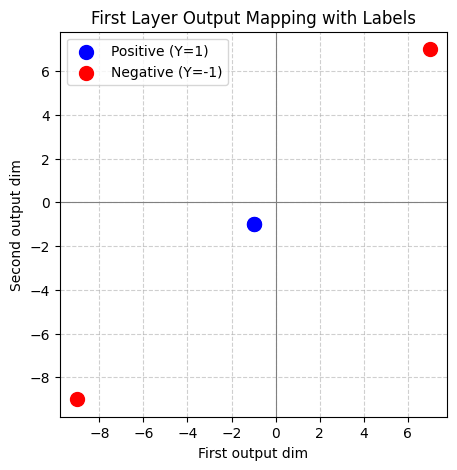

In [39]:
# Separate by label
pos_points = f[Y == 1]
neg_points = f[Y == -1]

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', label='Positive (Y=1)', s=100, marker='o')
plt.scatter(neg_points[:, 0], neg_points[:, 1], color='red', label='Negative (Y=-1)', s=100, marker='o')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlabel("First output dim")
plt.ylabel("Second output dim")
plt.title("First Layer Output Mapping with Labels")
plt.show()

In [42]:
W = np.array([[-2, 2], [-2, 2]])
w0 = np.array([1, 1])

f = []  

for i in range(len(X)):
    result = layer(X[i], W, w0, linear_act_func)
    f.append(result)
f = np.array(f)
f

array([[-1, -1],
       [-9, -9],
       [ 7,  7],
       [-1, -1]])

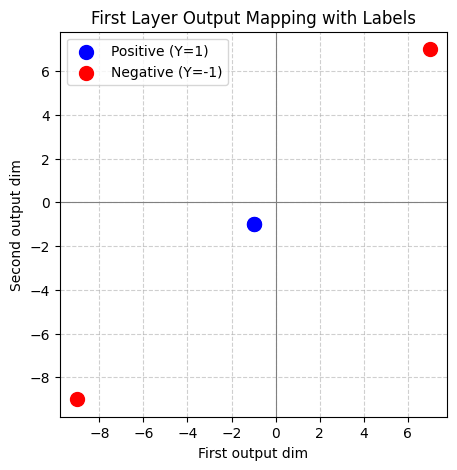

In [43]:
# Separate by label
pos_points = f[Y == 1]
neg_points = f[Y == -1]

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', label='Positive (Y=1)', s=100, marker='o')
plt.scatter(neg_points[:, 0], neg_points[:, 1], color='red', label='Negative (Y=-1)', s=100, marker='o')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlabel("First output dim")
plt.ylabel("Second output dim")
plt.title("First Layer Output Mapping with Labels")
plt.show()

## Non-linear Activation Functions

In [44]:
max(0, 1)

1

In [52]:
def act_func_1(z):
    return 5*z - 2
def ReLU(z):
    return np.maximum(0, z)
def tanh(z):
    return 1 - 2/(np.exp(2*z) + 1)

activations = [
    ("act_func_1", act_func_1),
    ("ReLU", ReLU),
    ("tanh", tanh),
    ("identity", lambda x: x)
]

In [53]:
W = np.array([[1, -1], [-1, 1]])
w0 = np.array([1, 1])

results = [np.array([layer(X[i], W, w0, act) for i in range(len(X))]) for _, act in activations]
results

[array([[ 3,  3],
        [13, -7],
        [-7, 13],
        [ 3,  3]]),
 array([[1, 1],
        [3, 0],
        [0, 3],
        [1, 1]]),
 array([[ 0.76159416,  0.76159416],
        [ 0.99505475, -0.76159416],
        [-0.76159416,  0.99505475],
        [ 0.76159416,  0.76159416]]),
 array([[ 1,  1],
        [ 3, -1],
        [-1,  3],
        [ 1,  1]])]

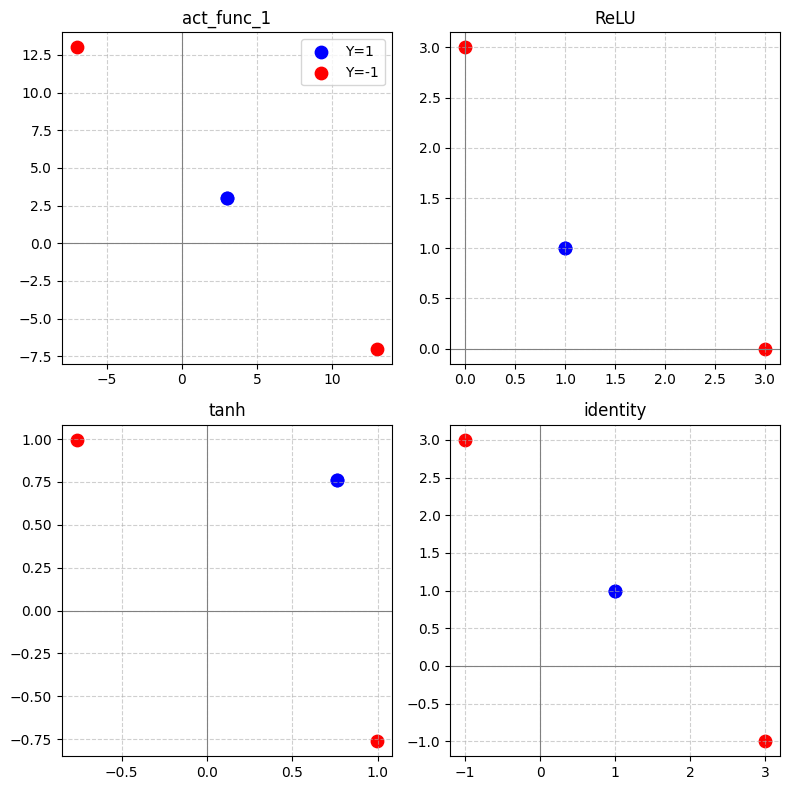

In [59]:
# Plot in 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

for idx, (name, _) in enumerate(activations):
    ax = axes[idx]
    f = results[idx]
    pos_points = f[Y == 1]
    neg_points = f[Y == -1]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', label='Y=1', s=80, marker='o')
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', label='Y=-1', s=80, marker='o')
    ax.axhline(0, color='gray', linewidth=0.8)
    ax.axvline(0, color='gray', linewidth=0.8)
    ax.set_title(name)
    ax.grid(True, linestyle='--', alpha=0.6)

# Show legend only once
axes[0].legend()
plt.tight_layout()
plt.show()